In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import ppscore as pps

C:\Users\belle\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### №1 Загрузка данных

In [2]:
data = pd.read_csv('HR.csv') # загружаем данные

In [3]:
data.head(3) # смотрим первые 3 записи в начале

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium


In [4]:
data.tail(3) # и в конце

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [5]:
data.info() # смотрим данные на отсутствие пропусков и правильность типов данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### №2 Расчет мер центральной тенденции и мер изменчивости 

In [6]:
data.describe() # расчет всех мер с помощью функции describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
data.median() 
# однако, можно воспользоваться и другими методами, например median() - эта функция рассчитывает медиану,
# что соответствует 50% перцентилю или 2-му квартилю в функции describe()

satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

### №3 Корреляция и корреляционная матрица

In [8]:
data.corr(method='pearson') # корреляция Пирсона

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


In [9]:
data.corr(method='kendall') # корреляция Кэндала

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.113865,0.022077,0.051126,-0.110005,0.046298,-0.300675,0.018332
last_evaluation,0.113865,1.000000,0.266267,0.235374,0.118842,-0.004749,-0.002010,-0.005903
number_project,0.022077,0.266267,1.000000,0.306987,0.195025,0.002096,-0.017601,-0.002666
average_montly_hours,0.051126,0.235374,0.306987,1.000000,0.119466,-0.004966,0.038045,-0.002417
time_spend_company,-0.110005,0.118842,0.195025,0.119466,1.000000,-0.024839,0.244851,0.032059
Work_accident,0.046298,-0.004749,0.002096,-0.004966,-0.024839,1.000000,-0.154622,0.039245
left,-0.300675,-0.002010,-0.017601,0.038045,0.244851,-0.154622,1.000000,-0.061788
promotion_last_5years,0.018332,-0.005903,-0.002666,-0.002417,0.032059,0.039245,-0.061788,1.000000


In [10]:
data.corr(method='spearman') # корреляция Спирмэна

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.162407,0.005786,0.062000,-0.139428,0.056333,-0.365842,0.022306
last_evaluation,0.162407,1.000000,0.350399,0.342061,0.161154,-0.005767,-0.002440,-0.007167
number_project,0.005786,0.350399,1.000000,0.397855,0.251971,0.002328,-0.019544,-0.002960
average_montly_hours,0.062000,0.342061,0.397855,1.000000,0.168750,-0.006063,0.046455,-0.002951
time_spend_company,-0.139428,0.161154,0.251971,0.168750,1.000000,-0.027277,0.268876,0.035205
Work_accident,0.056333,-0.005767,0.002328,-0.006063,-0.027277,1.000000,-0.154622,0.039245
left,-0.365842,-0.002440,-0.019544,0.046455,0.268876,-0.154622,1.000000,-0.061788
promotion_last_5years,0.022306,-0.007167,-0.002960,-0.002951,0.035205,0.039245,-0.061788,1.000000


(8.0, 0.0)

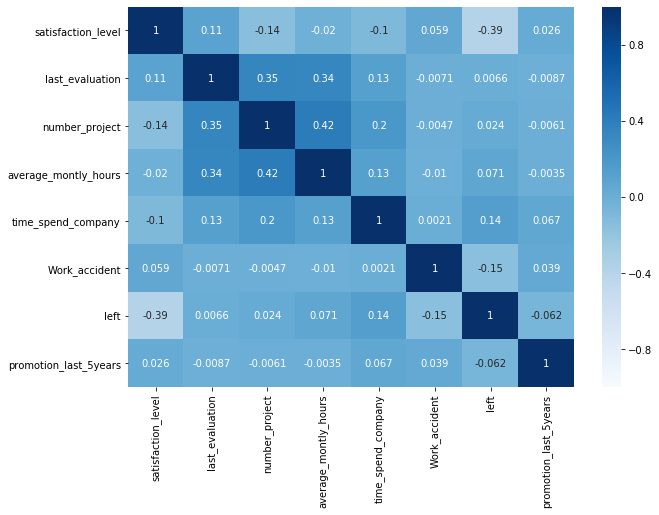

In [11]:
plt.figure(figsize=(10, 7))
ax = sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, center=0, square=False, cmap='Blues')
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)

# визуализация матрицы корреляции

### №4 Визуализировать несколько взаимосвязей между переменными

In [12]:
corr = data.corr().unstack().reset_index() # из сводной таблицы делаем простую таблицу

In [13]:
high_corr = corr[(np.abs(corr[0]) > (np.mean(corr[0]))) & (corr['level_0'] != corr['level_1'])].values 
# выбираем из таблицы корреляций значения коэффициента больше среднего(т.к переменных с высокой корреляцией нет).

In [14]:
high_corr

array([['satisfaction_level', 'left', -0.3883749834240633],
       ['last_evaluation', 'number_project', 0.349332588516267],
       ['last_evaluation', 'average_montly_hours', 0.3397417998383588],
       ['number_project', 'last_evaluation', 0.349332588516267],
       ['number_project', 'average_montly_hours', 0.4172106344017606],
       ['number_project', 'time_spend_company', 0.19678589126379795],
       ['average_montly_hours', 'last_evaluation', 0.3397417998383588],
       ['average_montly_hours', 'number_project', 0.4172106344017606],
       ['time_spend_company', 'number_project', 0.19678589126379795],
       ['left', 'satisfaction_level', -0.3883749834240633]], dtype=object)

C:\Users\belle\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\belle\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\belle\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


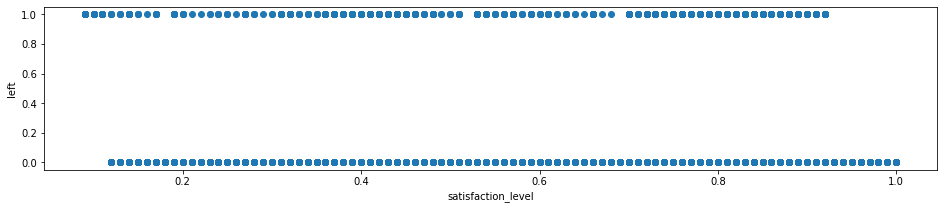

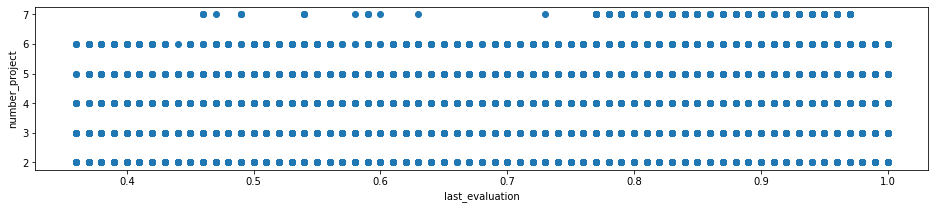

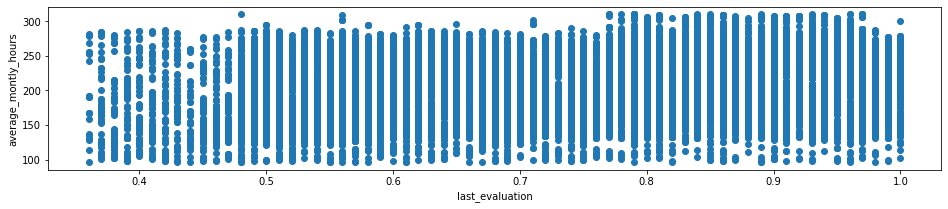

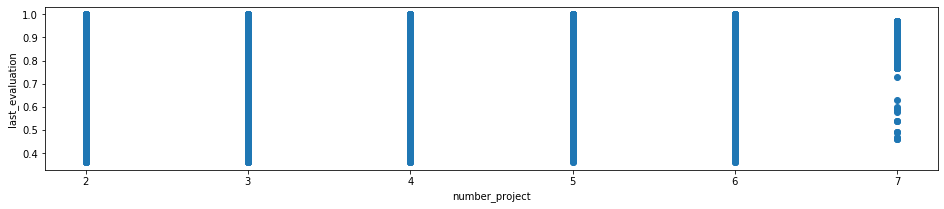

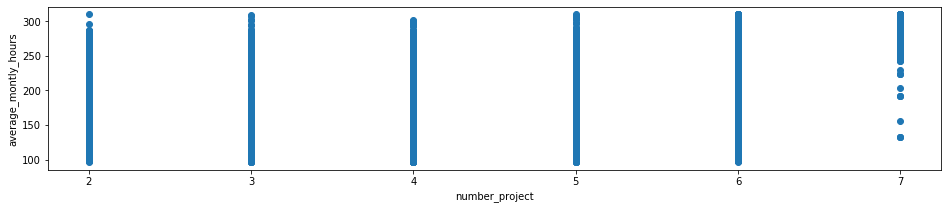

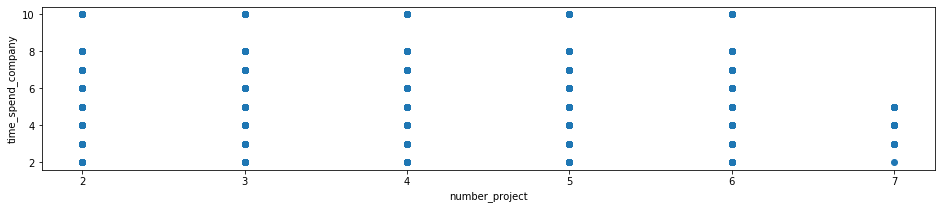

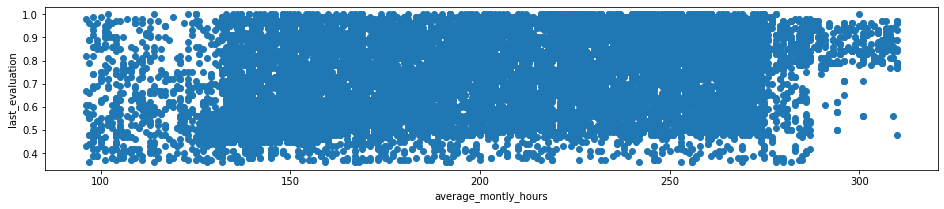

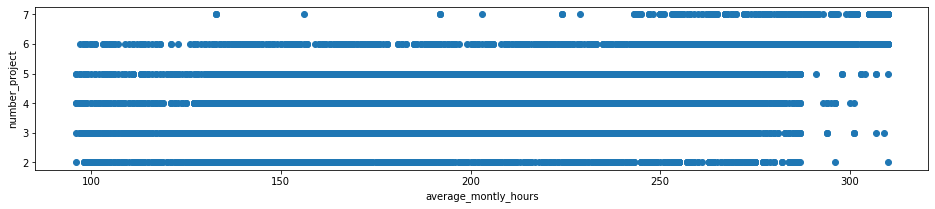

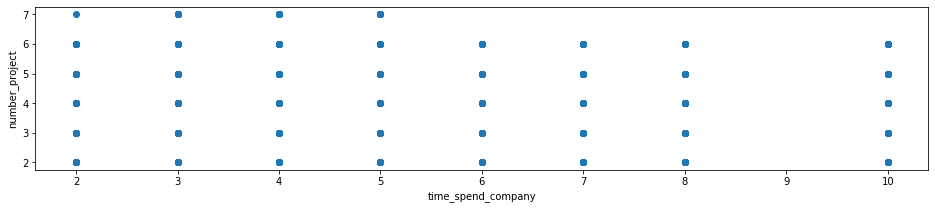

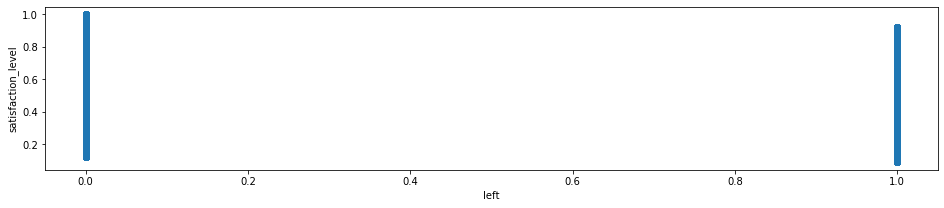

In [15]:
for features in high_corr:
    plt.figure(figsize=(16, 3))
    plt.plot(data[features[0]], data[features[1]], 'o')
    plt.xlabel(features[0])
    plt.ylabel(features[1])

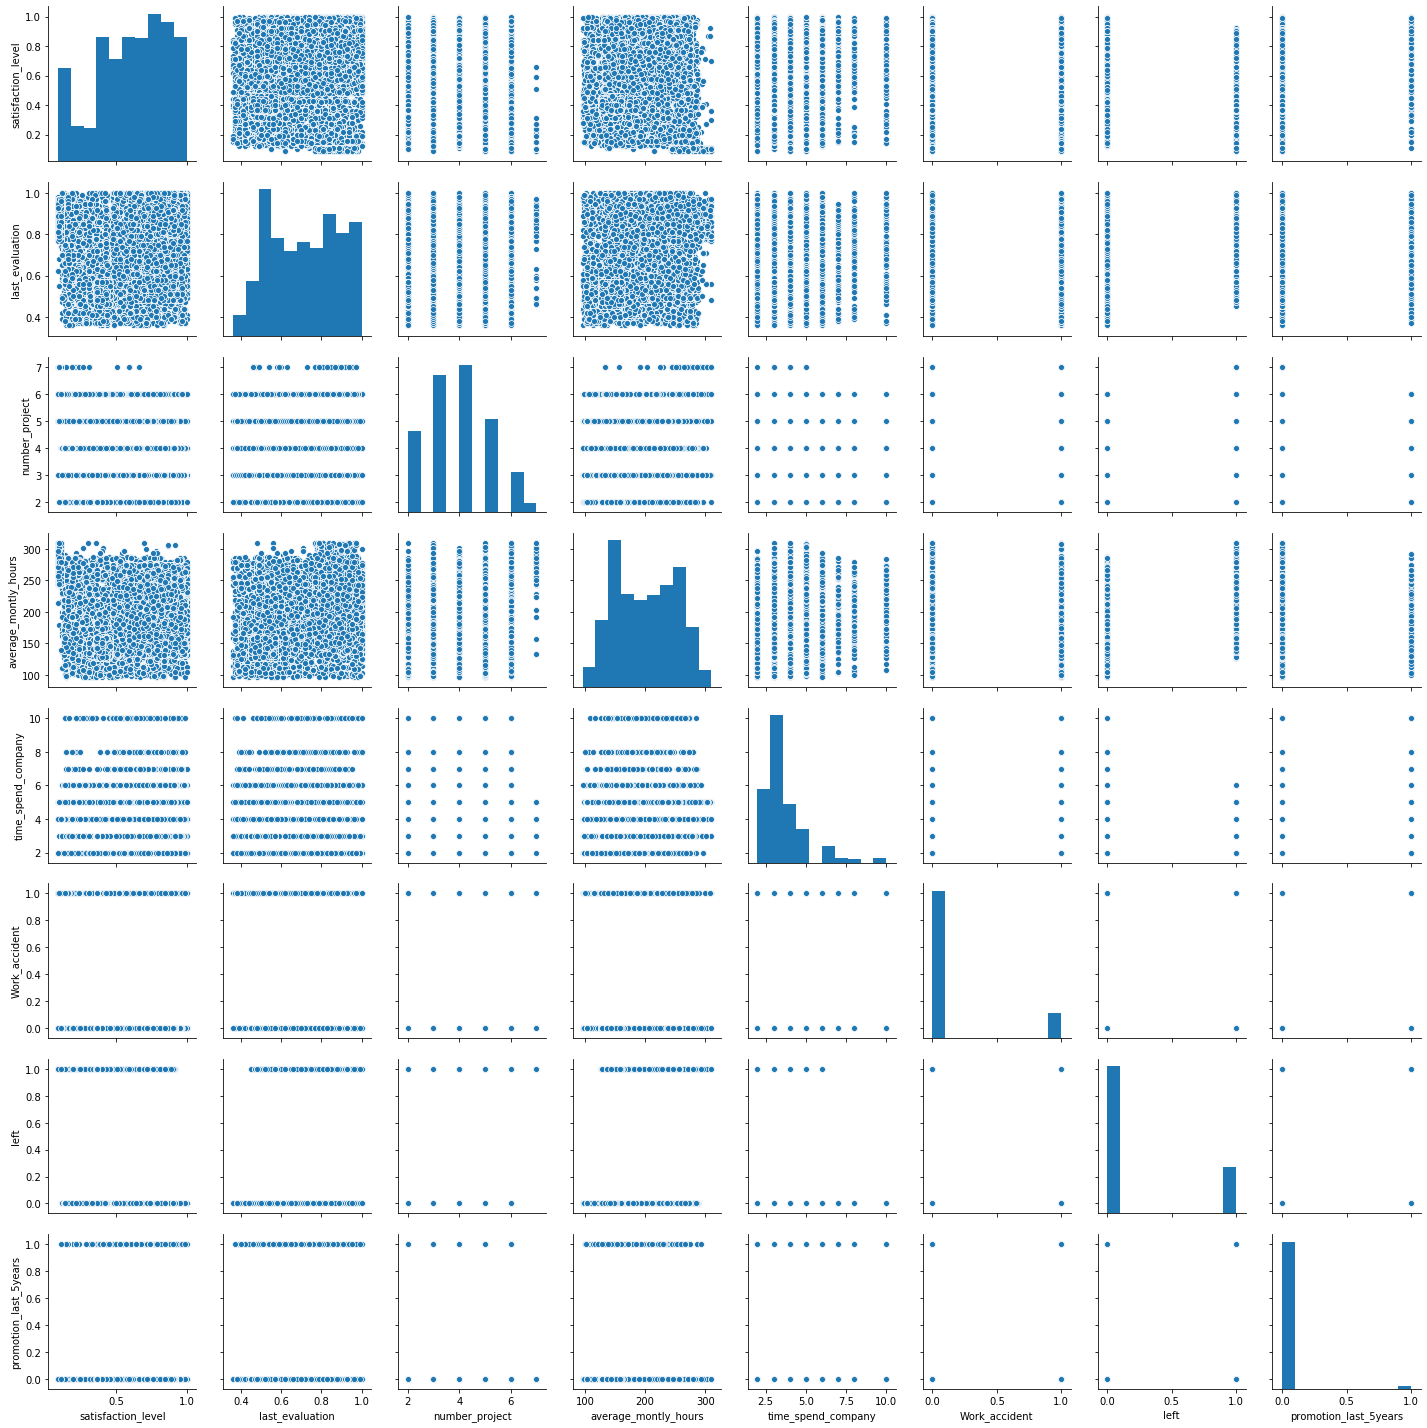

In [16]:
sns.pairplot(data)

### №5 С использованием t-test статистики проверить взаимосвязи между несколькими переменными
####  Проверим влияет ли отдел на уровень удовлетворения

In [17]:
sales = data[data['sales']=='sales']['satisfaction_level']
sales.head()
# из датасета оставим уровень удовлетворенности отдела продаж

0    0.38
1    0.80
2    0.11
3    0.72
4    0.37
Name: satisfaction_level, dtype: float64

In [18]:
supports = data[data['sales']=='support']['satisfaction_level']
supports.head()
# из датасета оставим уровень удовлетворенности отдела поддержки

46    0.40
47    0.57
48    0.40
49    0.43
50    0.13
Name: satisfaction_level, dtype: float64

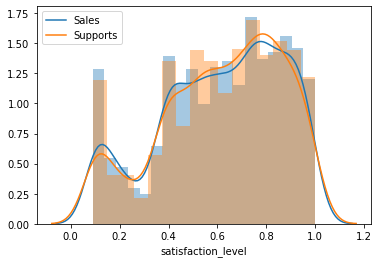

In [19]:
sns.distplot(sales, kde_kws={'label':'Sales'})
sns.distplot(supports, kde_kws={'label':'Supports'})
plt.rcParams['figure.figsize']=(14,5)
# посмотрим на распределение, оно не выглядит нормальным, есть выбросы в районе 0.1

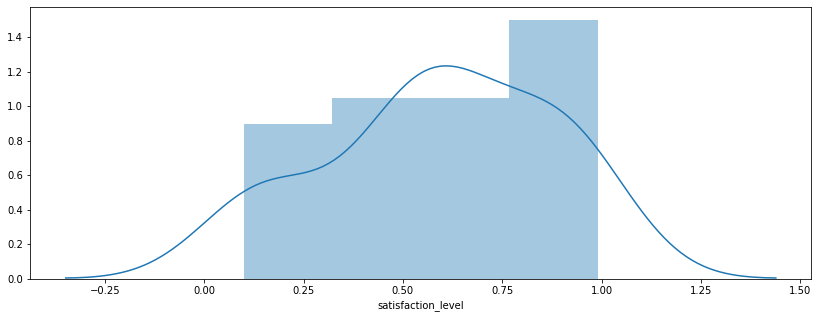

In [20]:
sale = sales.sample(n=30, replace=True)
sns.distplot(sale)
# из нашей выборки достанем случайную подвыборку отдела продаж. Распределение напоминает нормальную(колоколообразную) форму. 

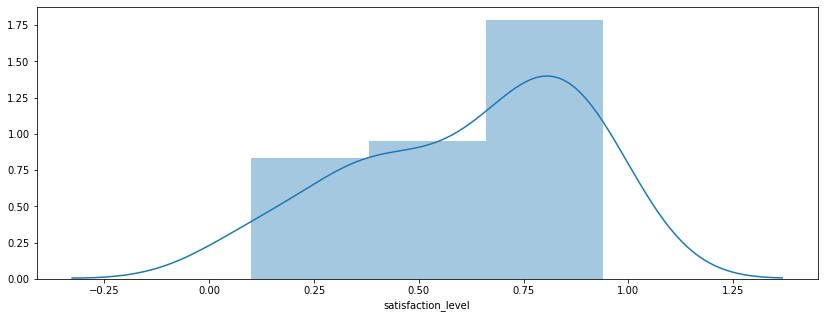

In [21]:
support = supports.sample(n=30, replace=True)
sns.distplot(support)
# повторим тоже самое, только с отделом поддержки. 

In [22]:
test_shapiro_sale = stats.shapiro(sale)
test_shapiro_sale
# H0 основана на том, что наши данные распределены нормально, как мы видим p-value > альфа, значит мы принимаем H0
# наша случайная выборка распределена нормально и к ней применим парный t-test для независимых переменных

(0.9254215359687805, 0.0371616967022419)

In [23]:
test_shapiro_support = stats.shapiro(support)
test_shapiro_support
# здесь мы также принимаем H0 т.к p-value гораздо больше 0.05

(0.9034847021102905, 0.010230743326246738)

In [24]:
stats.ttest_ind(sale, support)
# результаты теста, которые мы видим ниже, говорят о том, что в среднем уровень удовлетворенности в отделе продаж
# статистически не отличается от уровня удовлетворенности в отделе поддержки, т.к p-value > альфа и мы принимаем H0
# которая гласит, что статистичесикие средние значения не отличаются.

Ttest_indResult(statistic=-0.37923960309889887, pvalue=0.7058948600830208)

### №6 Рассчитать сколько работников работает в каждом департаменте

In [25]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [26]:
data.sales.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

### №7 Показать распределение сотрудников по зарплатам.

In [27]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [28]:
salary_by_group = data.salary.value_counts()
salary_by_group

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

Text(0, 0.5, 'Размер заработанной платы')

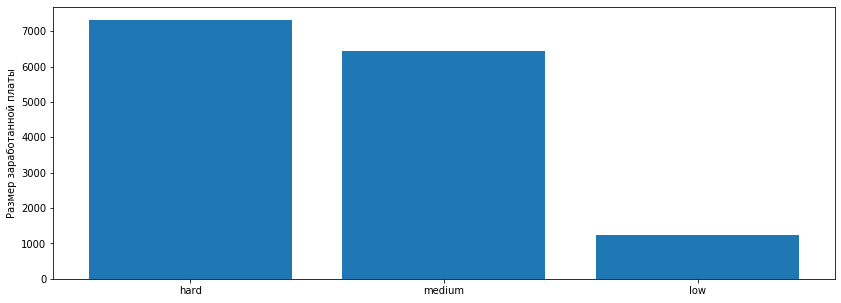

In [29]:
group = ['hard', 'medium', 'low']
salary = salary_by_group
plt.bar(group, salary)
plt.ylabel('Размер заработанной платы')

### №8 Показать распределение сотрудников по зарплатам совместно с департаментами.

In [30]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


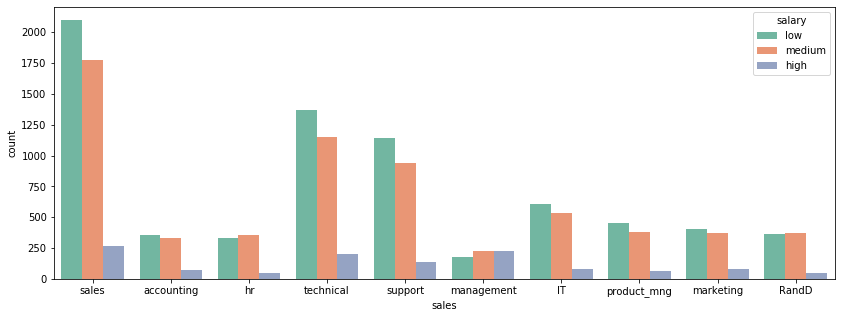

In [31]:
sns.countplot(x='sales', hue='salary', data=data, palette='Set2')

### №9 Сколько сотрудников покинули компанию

In [32]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [33]:
print(len(data[data['left']==1]), 'сотрудников уволилось из ', len(data['left']))

3571 сотрудников уволилось из  14999


### № 10 Почему увольняются сотрудники. Гипотезы

#### Проверим еще раз, есть ли корреляция между переменными. Возможно есть линейная зависимость, давайте проверим

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 <a list of 8 Text xticklabel objects>)

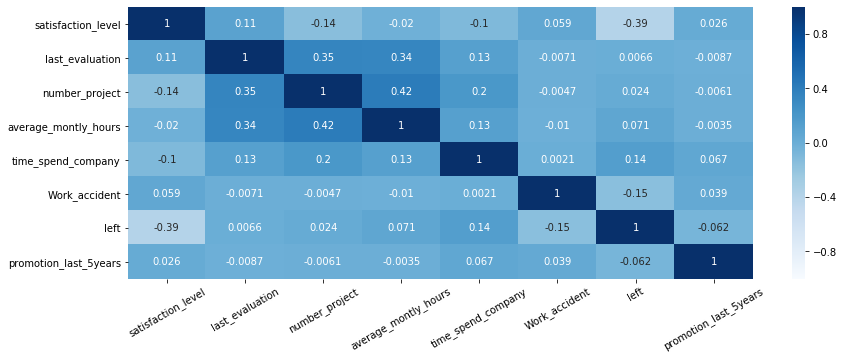

In [34]:
ax = sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, center=0, square=False, cmap='Blues')
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)
plt.xticks(rotation=30)

#### Итак, никакой явно выраженной линейной зависимости т.е корреляции между переменными в частности переменной 'left'  и всеми остальными нет. Остается проверить наши данные на нелинейную зависимость с помощью метода Predictive Power Score, возможно этот способ нам расскажет что-то новое про наши данные

In [35]:
def heatmap(df):
    ax = sns.heatmap(df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)
    ax.set_title('PPS matrix')
    ax.set_xlabel('feature')
    ax.set_ylabel('target')
    plt.xticks(rotation=30)
    i, k = ax.get_ylim()
    ax.set_ylim(i+0.5, k-0.5)
    return ax

In [36]:
matrix = pps.matrix(data)
matrix = matrix[['x','y','ppscore']].pivot(columns='x', index='y', values='ppscore')

C:\Users\belle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\belle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\belle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\belle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\belle\Anaconda3\lib\site-packages\sklearn\metrics\c

C:\Users\belle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\belle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\belle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\belle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\belle\Anaconda3\lib\site-packages\sklearn\metrics\c

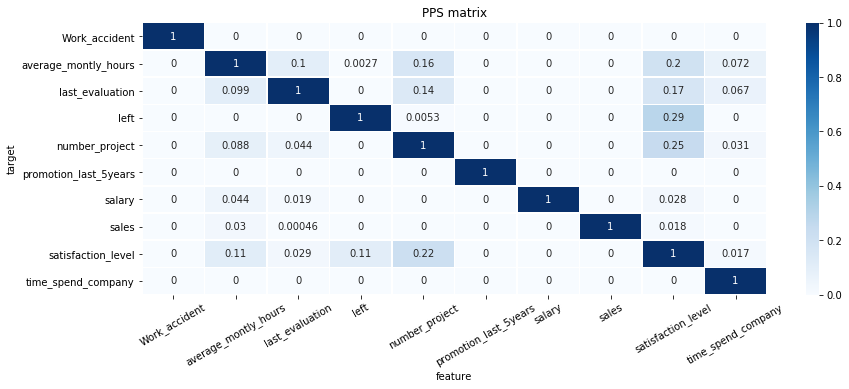

In [37]:
heatmap(matrix)

***С помощью метода PPscore, мы не видим чтобы какая то переменная явно 'предсказывала' или была нелинейно зависимой относительно переменной 'left'. Самый высокий показатель - 0.29. Это значит что есть небольшая зависимость переменной 'left' от 'satisfaction_level' и заметьте, что обратная связь заметно менее выраженная, это говорит о несимметричности переменных***

***Так как, только переменная 'satisfaction_level', хоть как-то коррелирует с переменной 'left', посмотрим если ли какие-то влияния третьих переменных:***

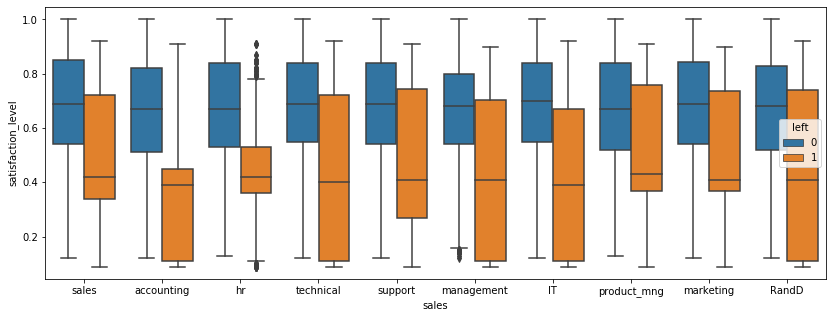

In [38]:
sns.boxplot(y=data['satisfaction_level'], x=data['sales'], hue=data['left'])
plt.show()
# Здесь четко видны все медианы (2-ой квартиль) оценок удовлетворенности в разрезе отделов. Они все примерно на одном уровне:
# для тех людей которые остались это значение - 0.7, для тех кто ушел - 0.4. 

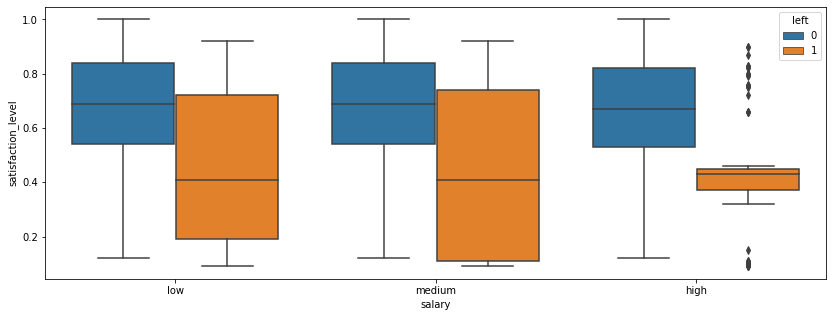

In [39]:
sns.boxplot(x=data['salary'], y=data['satisfaction_level'], hue=data['left'])
plt.show()

### Приступим к гипотезам и тестам. 
***Проверим, влияет ли уровень удовлетворения на увольнения***

In [61]:
satisfaction_left_0 = data[data['left']==0]['satisfaction_level']

In [62]:
satisfaction_left_1 = data[data['left']==1]['satisfaction_level']

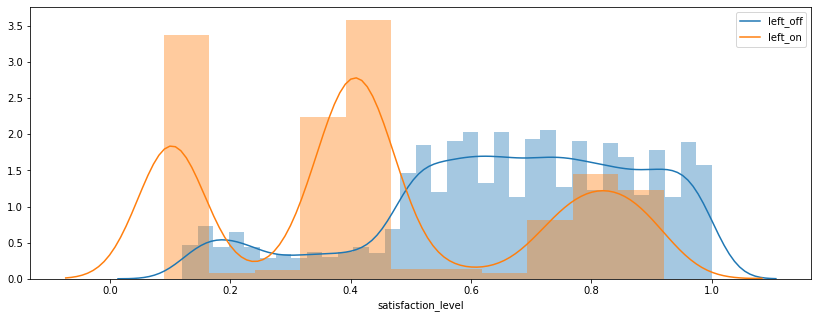

In [63]:
sns.distplot(satisfaction_left_0, kde_kws={'label':'left_off'})
sns.distplot(satisfaction_left_1, kde_kws={'label':'left_on'})
plt.show()

***Итак, распределение выглядит явно не нормально, значит t-test Стьюдента применить мы не может, применим непараметрический критерий Манна-Уитни:***

In [64]:
stats.mannwhitneyu(satisfaction_left_0, satisfaction_left_1)

MannwhitneyuResult(statistic=10286473.0, pvalue=0.0)

***или случайная выборка:*** 

In [65]:
satisfaction_left_0 = satisfaction_left_0.sample(n=500, replace=True)
satisfaction_left_1 = satisfaction_left_1.sample(n=500, replace=True)

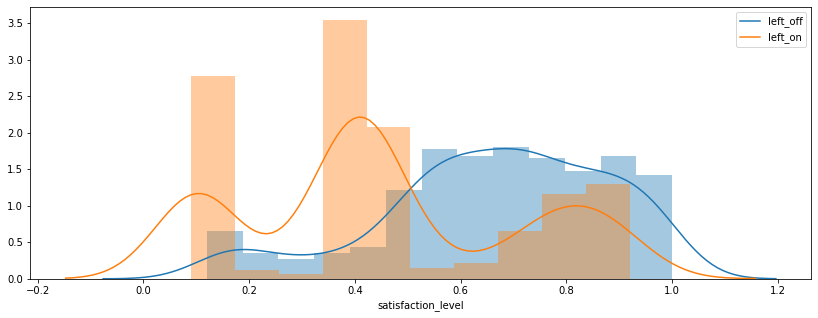

In [66]:
sns.distplot(satisfaction_left_0, kde_kws={'label':'left_off'})
sns.distplot(satisfaction_left_1, kde_kws={'label':'left_on'})
plt.show()

***Тоже не можем применить t-test, применим критерий Манна-Уитни:**

In [67]:
stats.mannwhitneyu(satisfaction_left_0, satisfaction_left_1)

MannwhitneyuResult(statistic=63655.0, pvalue=1.8511906047162927e-41)

***Итак, p-value гораздо меньше 0.05. Значит мы отклоняем H0 и принимаем H1. Мы можем сделать вывод, что уровень удовлетворения  достаточно сильно влияет на увольнения в компании.***

***Проверим, влияет ли среднее переработки на увольнения***

In [70]:
average_hours_0 = data[data['left']==0]['average_montly_hours']
average_hours_1 = data[data['left']==1]['average_montly_hours']

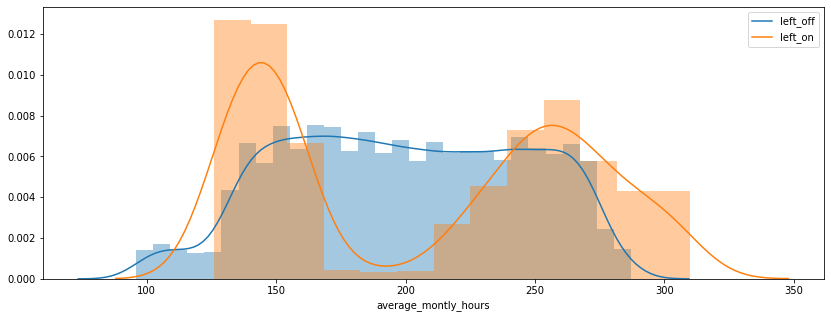

In [75]:
sns.distplot(average_hours_0, kde_kws={'label':'left_off'})
sns.distplot(average_hours_1, kde_kws={'label':'left_on'})
plt.show()

***Распределение вновь не явно не похоже на нормальное, снова применим критерий Манна-Уитни:***

In [76]:
stats.mannwhitneyu(average_hours_0, average_hours_1)

MannwhitneyuResult(statistic=19119787.5, pvalue=6.38478299217712e-09)

***p-value < 0.05, мы вынуждены отклонить H0 и принять H1. Можно сделать вывод, что переработки влияют на увольнения***